In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout,Bidirectional
from tensorflow.keras.metrics import RootMeanSquaredError


In [9]:

# file_path = '/content/drive/My Drive/sem5 project/SLYieldData.csv'
# df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
# df2 = pd.read_csv('/content/drive/MyDrive//sem5 project/Sri Lanka 3-Month Bond Yield Historical Data .csv',index_col="Date",parse_dates=True)

In [10]:
#df = pd.read_csv('/content/drive/MyDrive/5th sem project/SLYieldData.csv', index_col='Date', parse_dates=True)
# df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5th sem project/2009-2018 - 3-Month Bond Yield Historical Data (2).csv',index_col="Date",parse_dates=True)

df4

In [11]:
df2 = pd.read_csv(r'..\Data\3-Month 2009-2019.csv', index_col="Date", parse_dates=True)


In [12]:
df2.tail()

,Price,Open,High,Low,Change %
Date,,,,,
2009-04-26,12.942,12.942,12.942,12.942,-4.35%
2009-04-19,13.530,13.530,13.530,13.530,-5.71%
2009-04-12,14.350,14.350,14.350,14.350,-0.54%
2009-04-05,14.428,14.428,14.428,14.428,-0.37%
2009-03-29,14.481,14.481,14.481,14.481,19.43%


In [13]:
df2.reset_index(inplace=True)
df2['Date'] = df2['Date'].astype(str)

valid_date_pattern = r'^\d{4}-\d{2}-\d{2}'
df2 = df2[df2['Date'].str.match(valid_date_pattern)]
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      427 non-null    object 
 1   Price     427 non-null    float64
 2   Open      427 non-null    float64
 3   High      427 non-null    float64
 4   Low       427 non-null    float64
 5   Change %  427 non-null    object 
dtypes: float64(4), object(2)
memory usage: 20.1+ KB


In [14]:
df2.head(10)

,Date,Price,Open,High,Low,Change %
0,2017-05-28,9.650,9.650,9.650,9.650,1.15%
1,2017-05-21,9.540,9.540,9.540,9.540,-1.14%
2,2017-05-14,9.650,9.650,9.650,9.650,4.04%
3,2017-05-07,9.275,9.275,9.275,9.275,-0.27%
4,2017-04-30,9.300,9.300,9.300,9.300,-3.80%
5,2017-04-23,9.667,9.667,9.667,9.667,-1.31%
6,2017-04-16,9.795,9.795,9.795,9.795,0.46%
7,2017-04-09,9.750,9.750,9.750,9.750,0.34%
8,2017-04-02,9.717,9.717,9.717,9.717,0.35%
9,2017-03-26,9.683,9.683,9.683,9.683,0.49%


In [15]:
# df2=df2[['Price']]
# df = df[['X3M']]
df2.tail()

,Date,Price,Open,High,Low,Change %
422,2009-04-26,12.942,12.942,12.942,12.942,-4.35%
423,2009-04-19,13.530,13.530,13.530,13.530,-5.71%
424,2009-04-12,14.350,14.350,14.350,14.350,-0.54%
425,2009-04-05,14.428,14.428,14.428,14.428,-0.37%
426,2009-03-29,14.481,14.481,14.481,14.481,19.43%


In [16]:
df2 = df2.iloc[::-1].reset_index(drop=False)
# df2 = df2.sort_values('Date')
# Display the reversed DataFrame
df2.head()

,index,Date,Price,Open,High,Low,Change %
0,426,2009-03-29,14.481,14.481,14.481,14.481,19.43%
1,425,2009-04-05,14.428,14.428,14.428,14.428,-0.37%
2,424,2009-04-12,14.350,14.350,14.350,14.350,-0.54%
3,423,2009-04-19,13.530,13.530,13.530,13.530,-5.71%
4,422,2009-04-26,12.942,12.942,12.942,12.942,-4.35%


In [17]:
df2.index = df2['Date']
df2.drop('Date', axis=1, inplace=True)
df2 = df2[['Price']]
df2.head()

,Price
Date,
2009-03-29,14.481
2009-04-05,14.428
2009-04-12,14.350
2009-04-19,13.530
2009-04-26,12.942


<Axes: xlabel='Date'>

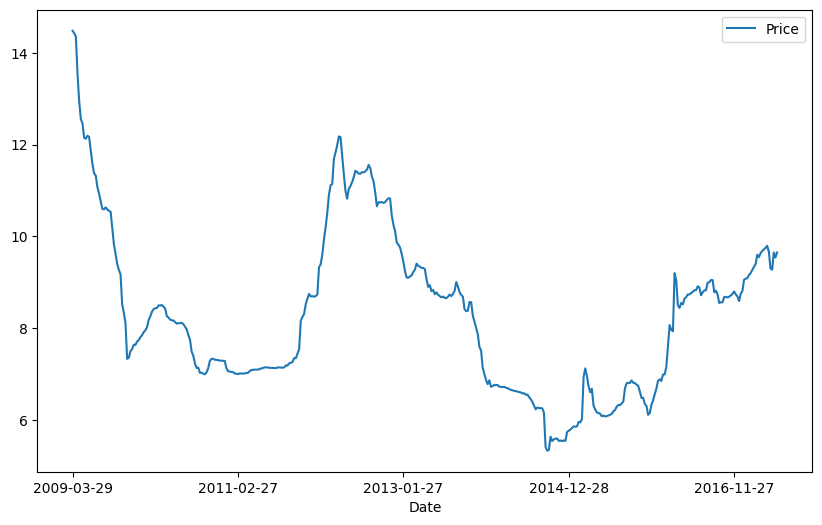

In [18]:
df2.plot(figsize=(10, 6))

In [19]:
# ThreeMonths = df.loc[:,'X3M']
# ThreeMonths.plot(figsize=(10, 6))

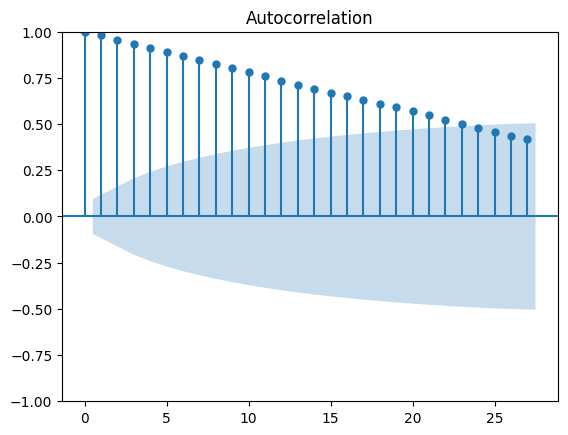

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df2.index = pd.to_datetime(df2.index)
# df.index = pd.to_datetime(df.index)

# Plot the autocorrelation function
plot_acf(df2['Price'])
# plot_pacf(df2['Price'])
plt.show()

In [21]:
# results = seasonal_decompose(df['X3M'],period=3)
# results.plot()

In [22]:
len(df2)
data = df2[['Price']]
# data = df[['X3M']]

print(data)

             Price
Date              
2009-03-29  14.481
2009-04-05  14.428
2009-04-12  14.350
2009-04-19  13.530
2009-04-26  12.942
...            ...
2017-04-30   9.300
2017-05-07   9.275
2017-05-14   9.650
2017-05-21   9.540
2017-05-28   9.650

[427 rows x 1 columns]


In [23]:
train_size = int(len(data)*0.8)  # Have to multiply by 0.8
train = data[:train_size]
test = data[train_size:]

In [24]:
train.tail()

,Price
Date,
2015-09-06,6.811
2015-09-13,6.805
2015-09-20,6.863
2015-09-27,6.811
2015-10-04,6.806


In [25]:
scaler = StandardScaler()                       # MinMaxScaler()

scaler.fit(train)


train_scaled = scaler.transform(train)

test_scaled = scaler.transform(test)


In [26]:
time_step = 23
n_features = 1
# generator = TimeseriesGenerator(train_scaled, train_scaled, length=numberOfInput, batch_size=1)

In [27]:
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=time_step, batch_size=1)
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=time_step, batch_size=1)

In [28]:
# !pip install keras-tuner
import keras_tuner as kt

In [29]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), 
                   return_sequences=True, input_shape=(time_step, 1))))  # Input shape must be 3D
    model.add(Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Bidirectional(LSTM(units=hp.Int('units_2', min_value=50, max_value=200, step=50),return_sequences=True,)))
    model.add(Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Bidirectional(LSTM(units=hp.Int('units_3', min_value=50, max_value=200, step=50),return_sequences=True,)))
    model.add(Dropout(hp.Float('dropout3', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Bidirectional(LSTM(units=hp.Int('units_4', min_value=50, max_value=200, step=50))))
    model.add(Dropout(hp.Float('dropout4', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=[RootMeanSquaredError()])
    
    return model


# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Run the tuner
tuner.search(train_generator, epochs=50, validation_data=test_generator)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

Reloading Tuner from my_dir\lstm_tuning\tuner0.json


C:\Users\REDTECH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


C:\Users\REDTECH\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


318/318 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - loss: 0.2345 - root_mean_squared_error: 0.4780 - val_loss: 0.0343 - val_root_mean_squared_error: 0.1851
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - loss: 0.0905 - root_mean_squared_error: 0.3002 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1601
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0560 - root_mean_squared_error: 0.2346 - val_loss: 0.0510 - val_root_mean_squared_error: 0.2258
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - loss: 0.0525 - root_mean_squared_error: 0.2285 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1925
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 0.0388 - root_mean_squared_error: 0.1966 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 0.0273 - root_mean_squared_error: 0.1643 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1405
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/st

In [30]:
# loss_per_epoch = model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [31]:
train_predictions = model.predict(train_generator)
test_predictions = model.predict(test_generator)

318/318 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [32]:
# test_predictions = []

# arr = np.array([1,2,3])
# filename = '/content/drive/MyDrive/Colab Notebooks/5th sem project'
# np.save(filename,first_eval_batch)
# current_batch = first_eval_batch.reshape((1, numberOfInput, n_features))

# for i in range(len(test_scaled)):
#     current_pred = model.predict(current_batch)[0]
#     test_predictions.append(current_pred)
#     current_batch = np.append(current_batch[:, 1:, :],[[current_pred]], axis=1)
#     print(current_batch)

In [33]:
# first_eval_batch

In [34]:
true_train_predictions = scaler.inverse_transform(train_predictions)
true_test_predictions = scaler.inverse_transform(test_predictions)


In [35]:
# Assuming the date index matches the length of predictions
train_prediction_dates = data.index[time_step:train_size]
test_prediction_dates = data.index[train_size+time_step:]

# train_prediction_dates = data.index[:len(true_train_predictions)]  # Adjust to match true_train_predictions length
# test_prediction_dates = data.index[len(true_train_predictions):]

# Create DataFrame for predictions
train_predictions_df = pd.DataFrame(data=true_train_predictions, index=train_prediction_dates, columns=['Train Predictions'])
test_predictions_df = pd.DataFrame(data=true_test_predictions, index=test_prediction_dates, columns=['Test Predictions'])

# Merge the original DataFrame with the predictions DataFrame
combined_df = df2.join(train_predictions_df, how='left')
combined_df = combined_df.join(test_predictions_df, how='left')


In [36]:
combined_df.tail(20)

,Price,Train Predictions,Test Predictions
Date,,,
2017-01-15,9.079,NaN,9.095806
2017-01-22,9.092,NaN,9.066206
2017-01-29,9.158,NaN,9.032697
2017-02-05,9.200,NaN,9.084829
2017-02-12,9.271,NaN,9.118481
2017-02-19,9.336,NaN,9.194468
2017-02-26,9.400,NaN,9.258185
2017-03-05,9.600,NaN,9.314314
2017-03-12,9.550,NaN,9.518109


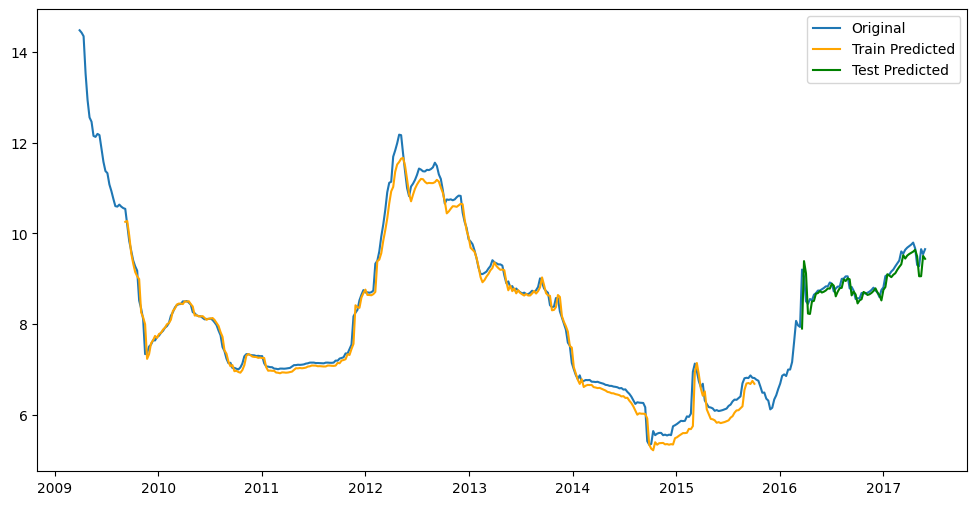

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Price'], label='Original')
plt.plot(combined_df['Train Predictions'], label='Train Predicted', color='orange')
plt.plot(combined_df['Test Predictions'], label='Test Predicted', color='green')
plt.legend()
plt.show()

In [38]:
# model.save('/content/drive/MyDrive/Colab Notebooks/5th sem project/Models/2009-2022 full train')

In [39]:
# from keras.models import load_model

# model1 =  load_model('/content/drive/MyDrive/Colab Notebooks/5th sem project/Models')

In [40]:
df3 = pd.read_csv('..\\Data\\3-Month 2017-2024.csv', index_col="Date", parse_dates=True)


In [41]:
df3

,Price,Open,High,Low,Change %
Date,,,,,
2024-07-07,10.300,10.300,10.300,10.300,0.00%
2024-06-30,10.300,10.050,10.300,9.900,2.49%
2024-06-23,10.050,10.000,10.250,10.000,8.06%
2024-06-16,9.300,9.100,9.300,9.000,2.20%
2024-06-09,9.100,8.800,9.200,8.750,3.41%
...,...,...,...,...,...
2017-02-12,9.271,9.271,9.271,9.271,0.77%
2017-02-05,9.200,9.200,9.200,9.200,0.46%
2017-01-29,9.158,9.158,9.158,9.158,0.73%


In [42]:
df3 = df3[['Price']]
df3 =df3.iloc[::-1].reset_index(drop=False)
df3.index = df3['Date']
df3.drop('Date', axis=1,inplace=True)


In [43]:
first_eval_batch = test_scaled[-time_step:]

In [44]:
from datetime import datetime

def weeks_between_dates(fixed_date, given_date):
    # Ensure dates are in datetime format
    if isinstance(fixed_date, str):
        fixed_date = datetime.strptime(fixed_date, "%Y-%m-%d")
    if isinstance(given_date, str):
        given_date = datetime.strptime(given_date, "%Y-%m-%d")

    # Calculate the difference in days
    delta_days = (given_date - fixed_date).days

    # Convert days to weeks
    weeks = delta_days // 7
    weeks += 1 if delta_days % 7 > 0 else 0

    return weeks

# Example usage:
fixed_date =  '2017-05-28'      #"2015-06-14"

In [45]:
df3.tail(100)

,Price
Date,
2022-07-17,30.00
2022-07-31,30.00
2022-08-07,29.00
2022-08-14,27.50
2022-08-21,29.25
...,...
2024-06-09,9.10
2024-06-16,9.30
2024-06-23,10.05


In [46]:

def getPredictions(model,date,curr_set):
  predictions= []
  weeks = weeks_between_dates(fixed_date,date)
  initial_set = np.array(curr_set).reshape(1, -1)
  for week in range(weeks):
    curr_set = np.array(initial_set).reshape(1, -1)
    current_pred = model.predict(curr_set, verbose=0)
    predictions.append(current_pred)
    initial_set = np.append(initial_set[:, 1:],current_pred, axis=1)
    print(scaler.inverse_transform(initial_set))
    # print(predictions)
  return predictions


In [47]:
scaler.inverse_transform(first_eval_batch).flatten()

array([8.75 , 8.807, 9.056, 9.079, 9.092, 9.158, 9.2  , 9.271, 9.336,
       9.4  , 9.6  , 9.55 , 9.636, 9.683, 9.717, 9.75 , 9.795, 9.667,
       9.3  , 9.275, 9.65 , 9.54 , 9.65 ])

In [48]:
Future_date = '2018-12-08'
result = getPredictions(model,Future_date,first_eval_batch)

[[8.807      9.056      9.079      9.092      9.158      9.2
  9.271      9.336      9.4        9.6        9.55       9.636
  9.683      9.717      9.75       9.795      9.667      9.3
  9.275      9.65       9.54       9.65       9.53471724]]
[[9.056      9.079      9.092      9.158      9.2        9.271
  9.336      9.4        9.6        9.55       9.636      9.683
  9.717      9.75       9.795      9.667      9.3        9.275
  9.65       9.54       9.65       9.53471724 9.37840772]]
[[9.079      9.092      9.158      9.2        9.271      9.336
  9.4        9.6        9.55       9.636      9.683      9.717
  9.75       9.795      9.667      9.3        9.275      9.65
  9.54       9.65       9.53471724 9.37840772 9.18977845]]
[[9.092      9.158      9.2        9.271      9.336      9.4
  9.6        9.55       9.636      9.683      9.717      9.75
  9.795      9.667      9.3        9.275      9.65       9.54
  9.65       9.53471724 9.37840772 9.18977845 8.97622452]]
[[9.158      9.2 

In [49]:
result_reshaped = np.array(result).reshape(-1,1)
real_result = scaler.inverse_transform(result_reshaped)
# print(real_result)

In [50]:
Answer = real_result[-1]
print('Future predicted for ',Future_date,' is ',Answer)
# print('Actual value for ',Future_date,' is ',df3.loc[Future_date])

Future predicted for  2018-12-08  is  [8.329651]


In [51]:
dates = pd.date_range(start=fixed_date, periods=len(real_result), freq= 'W')
curr_df = pd.DataFrame(real_result, index=dates, columns=['Price'])

In [52]:
# curr_df.tail()

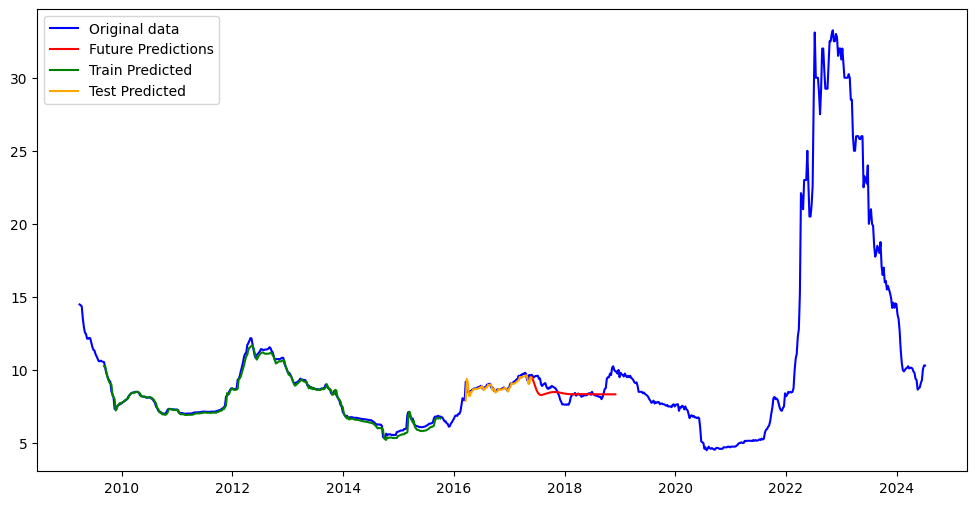

In [53]:
plt.figure(figsize=(12,6))
plt.plot(df3['Price'], color = 'blue' , label = 'Original data')
plt.plot(df2['Price'], color = 'blue')
plt.plot(curr_df['Price'], color = 'red', label = 'Future Predictions')
plt.plot(combined_df['Train Predictions'], color='green', label='Train Predicted')
plt.plot(combined_df['Test Predictions'], color='orange', label='Test Predicted')
plt.legend()
plt.show()

In [54]:
model.save('biLSTM_for_3months.keras')